In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
df = pd.read_excel(r"EastWestAirlines.xlsx")

In [3]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [4]:

# Handle missing values
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
for col in df.columns:
    print(f"{col}: {df[col].apply(type).unique()}")

ID#: [<class 'int'>]
Balance: [<class 'int'>]
Qual_miles: [<class 'int'>]
cc1_miles: [<class 'int'>]
cc2_miles: [<class 'int'>]
cc3_miles: [<class 'int'>]
Bonus_miles: [<class 'int'>]
Bonus_trans: [<class 'int'>]
Flight_miles_12mo: [<class 'int'>]
Flight_trans_12: [<class 'int'>]
Days_since_enroll: [<class 'int'>]
Award?: [<class 'int'>]


In [8]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str)

In [9]:
for col in df.columns:
    print(f"{col}: {df[col].apply(type).unique()}")

ID#: [<class 'int'>]
Balance: [<class 'int'>]
Qual_miles: [<class 'int'>]
cc1_miles: [<class 'int'>]
cc2_miles: [<class 'int'>]
cc3_miles: [<class 'int'>]
Bonus_miles: [<class 'int'>]
Bonus_trans: [<class 'int'>]
Flight_miles_12mo: [<class 'int'>]
Flight_trans_12: [<class 'int'>]
Days_since_enroll: [<class 'int'>]
Award?: [<class 'int'>]


In [10]:
# Initialize LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# Create a dictionary to store the mapping
mapping_dict = {}
# Apply label encoding to categorical columns
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
for col in categorical_cols:
    # Apply the encoder and store the mapping
    df[col] = encoder.fit_transform(df[col])
    mapping_dict[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

In [11]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [12]:
# Select only numeric columns
import numpy as np
df_numeric = df.select_dtypes(include=[np.number])

# Compute IQR on numeric data only
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df_filtered = df_numeric[~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]


In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

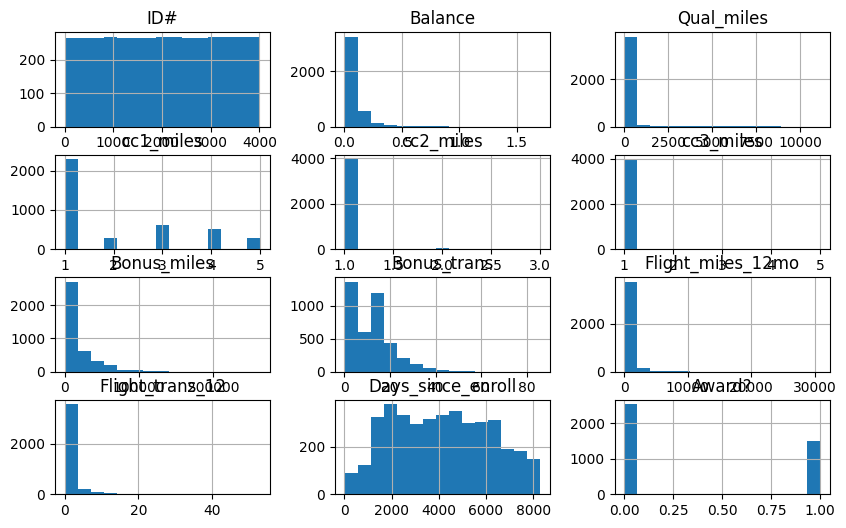

<Axes: >

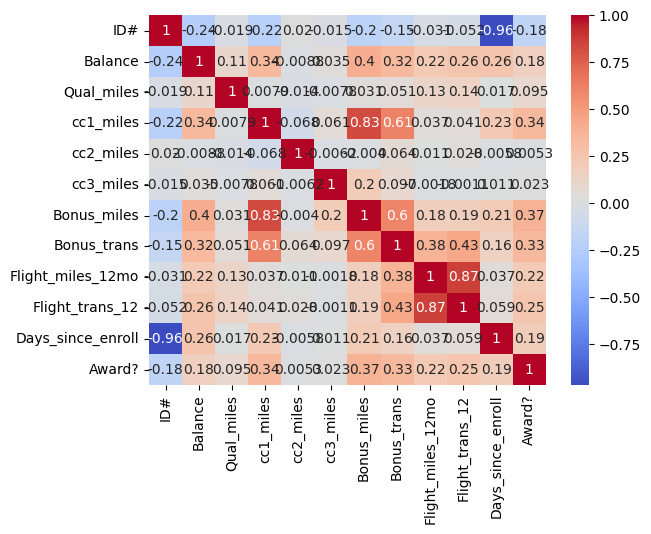

In [15]:
# Distribution
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(bins=15, figsize=(10, 6))
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_df = pca.fit_transform(scaled_df)

 K-Means Clustering

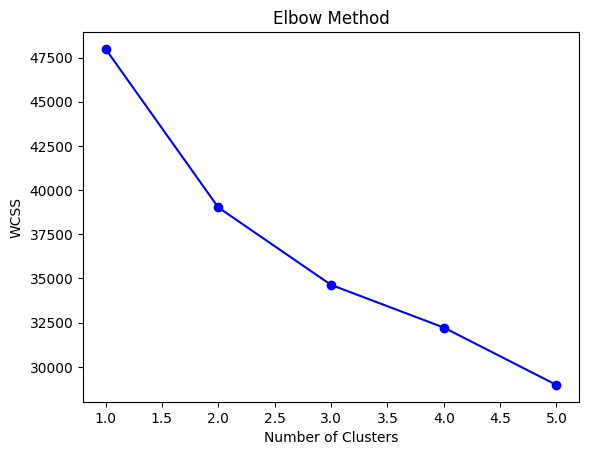

Silhouette Score (KMeans): 0.2690112341329993


In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow Method
wcss = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 6), wcss, 'bo-')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# Final model
kmeans = KMeans(n_clusters=3, random_state=0)
labels_kmeans = kmeans.fit_predict(scaled_df)
print("Silhouette Score (KMeans):", silhouette_score(scaled_df, labels_kmeans))

Hierarchical Clustering 

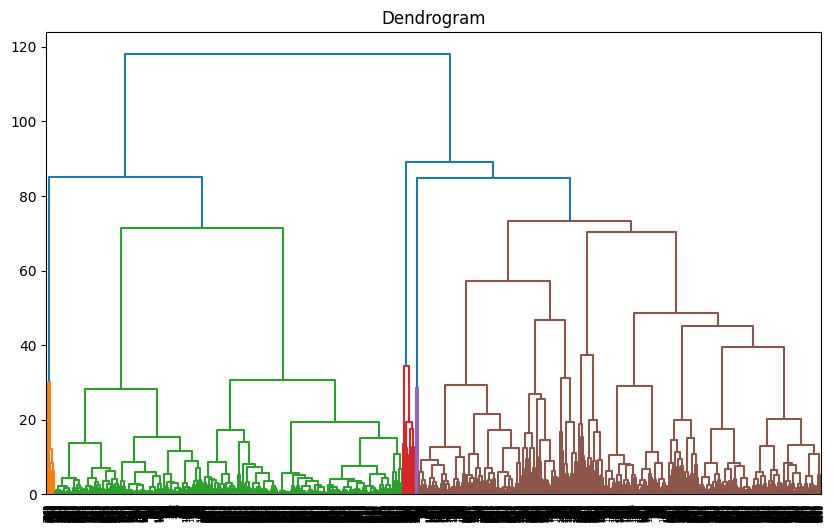

Silhouette Score (Hierarchical): 0.20526614352218822


In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

linked = linkage(scaled_df, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title('Dendrogram')
plt.show()

hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels_hc = hc.fit_predict(scaled_df)
print("Silhouette Score (Hierarchical):", silhouette_score(scaled_df, labels_hc))

DBSCAN

In [19]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(scaled_df)

# Count the number of clusters (excluding noise: label = -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

if n_clusters > 1:
    score = silhouette_score(scaled_df, labels)
    print("Silhouette Score (DBSCAN):", score)
else:
    print("DBSCAN resulted in only one cluster or all noise. Try adjusting eps or min_samples.")

Silhouette Score (DBSCAN): -0.2823258834687895


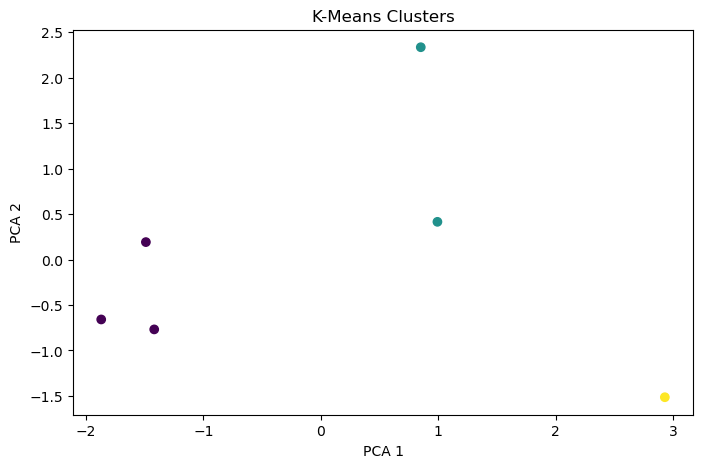

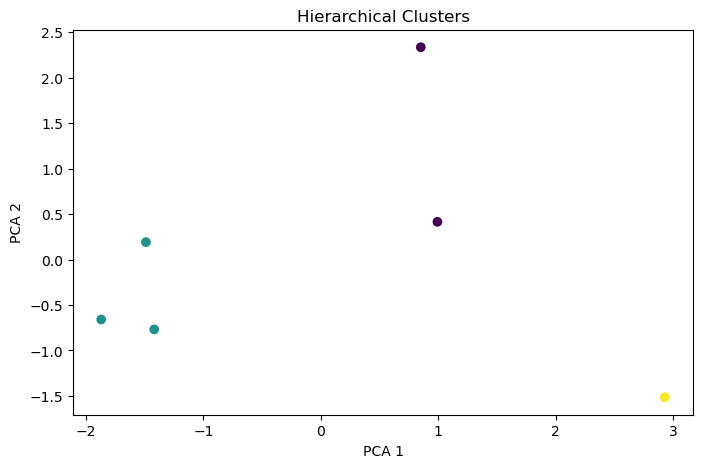

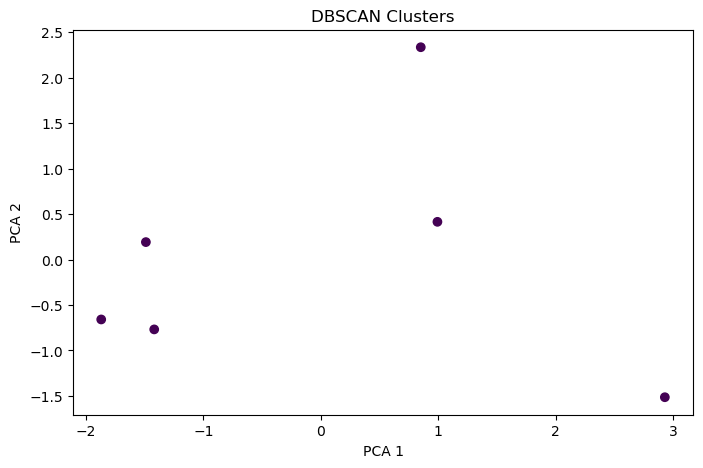

In [ ]:
def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 5))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

plot_clusters(pca_df, labels_kmeans, 'K-Means Clusters')
plot_clusters(pca_df, labels_hc, 'Hierarchical Clusters')
plot_clusters(pca_df, labels_dbscan, 'DBSCAN Clusters')